# Signals and Signal Processing

Let's see how can we process sound data.

In [ ]:
!pip install torchaudio
!pip install soundfile
!pip install torchaudio-filters

In [ ]:
#all imports here, please

import numpy as np

import torch
import torchaudio
import torchaudio_filters as tf

import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

## Audio and Digital Audio

First of all, we will start by loading some `wav` file.

In [ ]:
wav, sr = sf.read('testVoiceTrack.wav')

In [ ]:
print(f"Sample rate: {sr}Hz")
print(f"Wav({len(wav)} samples):", wav)#wav is an np.array

In [ ]:
#torch soundfile wrapper 
wav, sr = torchaudio.load('testVoiceTrack.wav')

Sample rate is part of the file metadata in `testVoiceTrack.wav`

The `waveform` is exactly wav. This is a sequence of amplitudes in the range `[-1, 1]` of type `float32 (32 bits)` , it roughly depicts how the diaphragm of the speaker should respond on the playback. 

It is though dependent on the file given: by default the amplitudes are stored in integer form, i.e. for instance 

* `[-32767, 32767]` (16bit PCM16) or
* `[-8388607,8388607]` (24bit PCM24) 

In practice soundfile, torchaudio and scipy.wavio transform amplitudes in float format setting the ceiling at `1`.

As to the shape,

In [ ]:
wav.shape

The first dimension is [number of channels](https://en.wikipedia.org/wiki/Multichannel_audio). 

* **Mono** means **1 channel** -- used for instrumental and microphone recording, technical recordings and for simple playbacks like on a phone
  
* **Stereo**  means **2 channels** -- common thing, you commonly listen to music in this format. 

* There are also formats like [**5.1 Surround Sound**](https://www.limecraft.com/multi-channel-audio-challenges-and-benefits/) -- for playback with 5 speakers(front left,front right, center, surround left, surround right) + sub(Low Frequency Effect, LFE). In total, with **6 channels**.
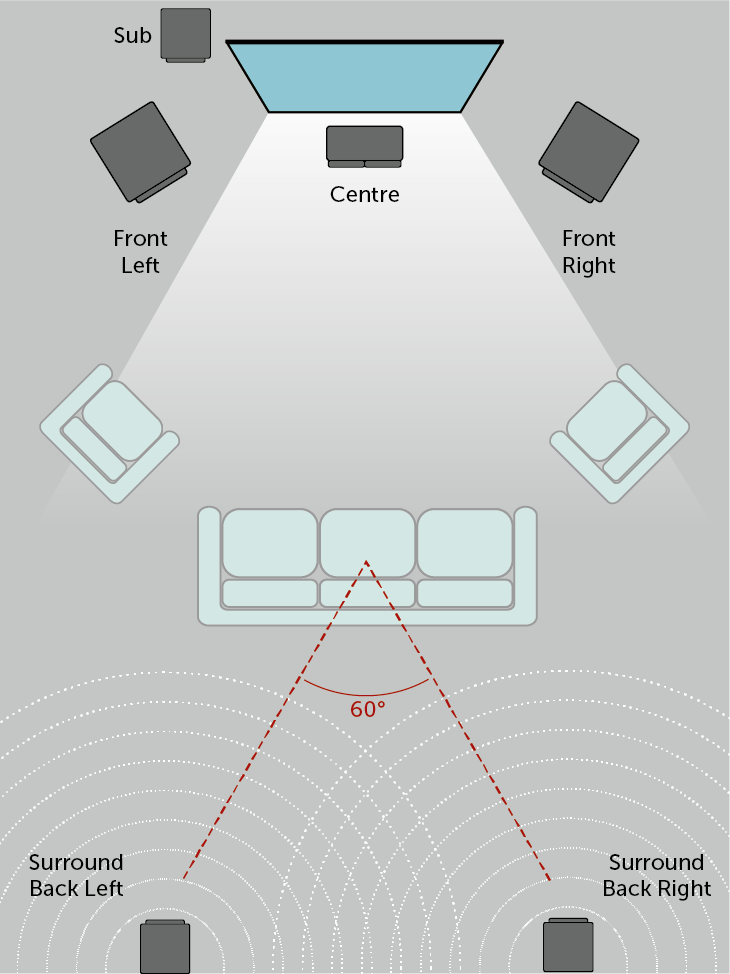

* A portable recorder like Zoom H2n for instance has the possibility to record **4-channel audio** with **4 microphones** onboard.
  
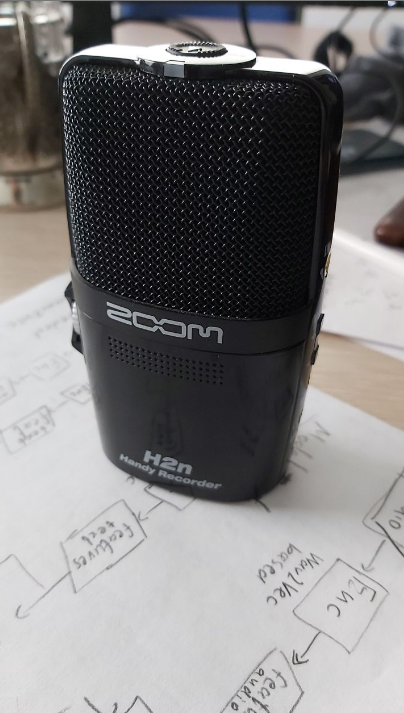

What's inside the data?

In [ ]:
def visualize_audio(wav: torch.Tensor, sr: int = 22050, monoConvert: bool = False):
    """Plots the given waveform

    Args:
        wav (torch.Tensor): waveform (Nch, T) or (T,)
        sr (int, optional): sample rate. Defaults to 22050.
    """    
    if(monoConvert):
        # Average all channels
        if(len(wav.shape)>1):
            # Any to mono audio convertion
            wav = wav.mean(dim=0)
        
        _,ax = plt.subplots(figsize=(14, 4))
        ax.plot(np.arange(0,wav.shape[0]/sr,1/sr),wav, alpha=.7, c='green')
        ax.grid()
        ax.set_xlabel('Time, sec', size=20)
        ax.set_ylabel('Amplitude', size=20)
    else:
        nChannels = wav.shape[0]
        if(nChannels==1):
            _,ax = plt.subplots(figsize=(14, 4))
            ax.plot(np.arange(0,wav.shape[1]/sr,1/sr),wav[0,:], alpha=.7, c='green')
            ax.grid()
            ax.set_xlabel('Time, sec', size=20)
            ax.set_ylabel('Amplitude', size=20)
        else:
            _, axs = plt.subplots(nChannels,1,figsize=(14, 4*nChannels))
            for id,ax in enumerate(axs):
                ax.plot(np.arange(0,wav.shape[1]/sr,1/sr),wav[id,:], alpha=.7, c='green')
                ax.grid()
                ax.set_xlabel('Time, sec', size=20)
                ax.set_ylabel(f'Amplitude, Ch={id+1}', size=20)
        
    plt.show()
    
    display.display(display.Audio(wav, rate=sr))

In [ ]:
visualize_audio(wav, sr)#np.concatenate([wav,wav*0.2],axis=0))

In [ ]:
wav = torch.mean(wav,0,keepdim=True)

## Discrete Fourier Transform (DFT), Static Signal Representation

Now, let's look at [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (Fast Fourier Transform)

We take the first `1024` samples and transform them. To get the right format of the spectrum below Nyquist frequency, we can use `rfft` and the size of the output spectrum will be `n_fft // 2 + 1`.

In [ ]:
nFFT = 1024
spectrum = #compute DFT with torch.fft (FFT)
spectrumR = #compute DFT with torch.fft (RFFT)

Both spectra have `complex` type and different shapes:

In [ ]:
print(f"spectrum.dtype={spectrum.dtype}, spectrumR.dtype={spectrumR.dtype},")
print(f"spectrum.shape={spectrum.shape}, spectrumR.shape={spectrumR.shape},")

In [ ]:
freqs = #???#compute the frequencies (FFT)
freqsR = #???#compute the frequencies (RFFT)
print(f"freqs.shape={freqs.shape}, freqsR.shape={freqsR.shape}")

Fourier transform gives a static signal representation. We just measure all the frequency component in the whole signal. 

From it we can compute a **power spectrum** and observe which frequency components were presented in the signal and what was their strength. The longer the signal, the better the frequency resolution.

In [ ]:
powerSpectrum = #compute power spectrum
powerSpectrumR = #???

In [ ]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(14, 8))

ax1.grid()
ax1.set_title("Raw Output")
ax1.plot(freqs, powerSpectrum.squeeze(), c='green')
ax1.set_ylabel('Magnitude$^2$', size=16)

ax2.grid()
ax2.set_title("Cut Spectrum")
ax2.plot(freqsR, powerSpectrumR.squeeze(), c='green')
ax2.set_xlabel('Frequency (Hz)', size=16)
ax2.set_ylabel('Magnitude$^2$', size=16)
plt.show()

For better visual quality in audio engineering people often consider taking various Mel-scales like

$$
m = 2595*\log_{10}(1 + f/700)
$$

in frequency scale and dB scale like

$$
P_{dB} = 10*\log_{10}(P/P_0)
$$

in power measurements. The decibel scale is **relative**, i.e. it shows how signal magnitude differs on a logarithmic scale from the reference point. In AES 17 standard and DAWs the **dBFS (decibel to full scale)** scale is used:
$$
P_{dBFS} = 10*\log_{10}(P).
$$

In [ ]:
def melForward(f):
    return ??? #wikipedia suggestion
def melInverse(m):
    return ???
p0=1#dBFS, usually FAR MORE than any possible p you can encounter. If waveform in 0,1, it should be 1(AES17)
def dBForward(p):
    return ???
def dBInverse(pdB):
    return ???

f,(ax1,ax2) = plt.subplots(2,1,figsize=(14, 8))

ax1.grid()
ax1.set_title("Raw Output")
ax1.plot(freqs, dBForward(powerSpectrum.squeeze()/powerSpectrum.shape[-1]), c='green')
ax1.set_ylabel('log-Magnitude, dB', size=16)       
#ax1.set_xscale("function", functions=(melForward,melInverse))

ax2.grid()
ax2.set_title("Cut Spectrum")
ax2.plot(freqsR, dBForward(2*powerSpectrumR.squeeze()/powerSpectrum.shape[-1]), c='green')
ax2.set_xlabel('Frequency (Hz)', size=16)
ax2.set_ylabel('log-Magnitude, dB', size=16)             
ax2.set_xscale("function", functions=(melForward,melInverse))
plt.show()

If we are talking about STFT, short signal frames (512,1024,2048) are commonly used for FFT and there are aliasing and leakage effects. 

Let's look at the example.

In [ ]:
xs = np.sin(2*np.pi*np.arange(0,1,1/2000)*100) #sr=2kHz
xsSpectrum = ???#compute power spectrum
xsFreqs = ???#compute the frequencies

f,ax1 = plt.subplots(figsize=(14, 4))

ax1.grid()
ax1.set_title("Raw Output")
ax1.plot(xsFreqs, dBForward(xsSpectrum.squeeze()/xsSpectrum.shape[-1]), c='green')
ax1.set_ylabel('log-Magnitude, dB', size=16)    
plt.show()   

To mitigate it, a window is used, we'll use `Hann` window function.

In [ ]:
windowSize = nFFT
window = torch.hann_window(windowSize)

f,ax = plt.subplots(figsize=(5, 3))
ax.grid()
ax.set_title("1024-Sample Hann Window")
ax.plot(np.arange(0,nFFT)/sr,window, c='green')
ax.set_xlabel("Time, sec")
plt.show()

In [ ]:
wavClipped = wav[:,20*windowSize:21*windowSize]
wavClippedWindowed = window * wavClipped

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 3))

ax1.plot(wavClipped.squeeze(), c='green')
ax1.grid()
ax1.set_title('Raw Audio', size=18)
ax1.set_xlabel('Time', size=18)
ax1.set_ylabel('Amplitude', size=18)

ax2.grid()
ax2.plot(wavClippedWindowed.squeeze(), c='green')
ax2.set_title('Windowed Audio', size=18)
ax2.set_xlabel('Time', size=18)
ax2.set_ylabel('Amplitude', size=18)
plt.show()

In [ ]:
spectrum = torch.fft.rfft(wavClipped).abs().pow(2)
spectrumWindowed = torch.fft.rfft(wavClippedWindowed).abs().pow(2)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5))

ax1.grid()
ax1.plot(freqsR,dBForward(spectrum.squeeze()), c='green')
ax1.set_title('Power Spectrum, Raw Audio', size=18)
ax1.set_xlabel('Frequency (Hz)', size=18)

ax2.grid()
ax2.plot(freqsR, dBForward(spectrumWindowed.squeeze()), c='green')
ax2.set_title('Power Spectrum, Windowed Audio', size=18)
ax2.set_xlabel('Frequency (Hz)', size=18)
    
plt.show()

## 

Let's put it all together and apply [STFT](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (Short-time Fourier transform)

In [ ]:
nFFT = 1024
windowSize = nFFT
hopSize = 256
window = torch.hann_window(nFFT)

In [ ]:
stft = torch.stft(
    wav,
    n_fft=nFFT,
    hop_length=hopSize,
    win_length=windowSize,
    window=window,
    
    # We don't want to center input signal for padding
    center=False,
    
    # Take first (n_fft // 2 + 1) frequencies, before Nyquist
    onesided=True,
    
    #Get complex numbers
    return_complex=True 
)

In [ ]:
stft.shape

In [ ]:
print(sr)
freqsR = np.arange(0,nFFT/2+0.0001)/(nFFT)*sr
print(freqsR.shape)
logSpectrogram = 20*torch.log10(stft.abs()/ window.sum()) 
logSpectrogram.shape

The last dimension of spectrogram is time. Each timestamp is called `frame`
Now let's visualize the spectrogram for the whole wav.

In [ ]:
f,ax = plt.subplots(figsize=(26, 6))

tGrid = np.arange(0,logSpectrogram.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
print(freqsR[-1])
tt,ff = np.meshgrid(tGrid,fGrid)
print(tt.shape,ff.shape,logSpectrogram.shape)
print(torch.max(logSpectrogram))
im=ax.pcolormesh(tt,ff,logSpectrogram.squeeze(),cmap="gist_heat",antialiased=True)
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

The last stage is `Mel Spectrogram`.

To initialise `Mel Scaler` we will use torchaudio.

In [ ]:
nMels=80
mel_scaler = torchaudio.transforms.MelScale(
    n_mels=nMels,
    sample_rate=sr,
    n_stft=nFFT // 2 + 1
)
print(mel_scaler.fb.shape)

`Mel Scaler` is nothing more than rectangle matrix. We will multiply each frame in spectrogram by `mel_scaler.fb` matrix. 

In [ ]:
f,ax = plt.subplots(figsize=(12,5))

ax.grid()
ax.set_title("Mel Filterbank")
ax.set_xlabel("Frequency, Hz")
ax.plot(freqsR,mel_scaler.fb)
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(9,5))

ax.grid()
ax.set_xlabel("Frequency, Hz")
ax.set_ylabel("Frequency, Mel")
ax.plot(freqsR, melForward(freqsR))
plt.show()

In [ ]:
melSpectrogram = #magnitude spectrogram in dBFS

In [ ]:
melSpectrogram.shape

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,melSpectrogram.shape[2]*hopSize, hopSize)/sr
fGrid = np.arange(nMels)
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,melSpectrogram.squeeze(),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, MelID', size=20)
f.colorbar(im)
plt.show()

### Built-in Spectrograms in PyTorch

In general, we can use `MelSpectrogram` from torchaudio which combine window, stft, spectrogram and mel calculation. This simplifies usage of spectrograms in the pipelines.

In [ ]:
melspecTransform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=nFFT,
    win_length=windowSize,
    hop_length=hopSize,
    n_mels=nMels,
    window_fn=torch.hann_window,
    center=False
)

Common `Spectrogram` is also available.

In [ ]:
specTransform = torchaudio.transforms.Spectrogram(
    n_fft=nFFT,
    win_length=windowSize,
    hop_length=hopSize,
    window_fn=torch.hann_window,
    center=False
)

In [ ]:
spec = specTransform(wav)
specMel = melspecTransform(wav)
print(spec.dtype,spec.shape)
print(specMel.dtype,specMel.shape)

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,spec.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(spec.squeeze()),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,specMel.shape[2]*hopSize, hopSize)/sr
fGrid = np.arange(nMels)
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff, 20*torch.log10(specMel.squeeze()),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, MelID', size=20)
f.colorbar(im)
plt.show()

## More things: Impulse Response

### Fundamentals

Impulse response is a very powerful modelling idea used in various audio effects. The theory is the following.

* There is clean signal $x(t)$ (can be analogue, i.e. continuous, or digital, discrete) 
* It is processed by the environment (acoustics, instrumental stack, FX stack..... ) and
* Processed signal is $y(t)$ is given as the output.

For example, acoustic FX like reverberation could be modelled as

$$
y(t) = (x \star h)(t),
$$

convolution kernel $h(t)$ is called system **Impulse Response (IR)** function.

There are various types of IR functions available on the internet, let's try one and see what's inside.

In [ ]:
irWav, irSR = torchaudio.load("./220752__jmuehlhans__impulse-response-church.wav")
resampleTransform = torchaudio.transforms.Resample(irSR, sr)
irWav = resampleTransform(irWav)
spec = specTransform(irWav)
freqsR = #frequencies for RFFT

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = #Compute time scale
fGrid = #Compute freq scale
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(spec.squeeze()),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

How does it sound?..

In [ ]:
display.display(display.Audio(irWav, rate=sr))

Let's convolve it with some speech and see what happens.

In [ ]:
wav, sr = torchaudio.load('testVoiceTrack.wav')
wav = torch.mean(wav,dim=0,keepdim=True)
convTransform = torchaudio.transforms.FFTConvolve()

In [ ]:
wavProcessed = convTransform(wav,irWav)
wavProcessedSpec = specTransform(wavProcessed)

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,wavProcessedSpec.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(wavProcessedSpec.squeeze()),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

In [ ]:
display.display(display.Audio(wavProcessed, rate=sr))

### Calculating Impulse Response from Scratch

Now when we see it really works, the natural question would be how to get these IRs? Here we praise functional calculus.

Let's see what we know for now: if $x(t)$ is input signal, $h(t)$ is the IR function of the environment then output is

$$
y(t) = (h \star x)(t).
$$

The convolution can be done not only with usual functions but also with linear functionals (from dual space). For example, 
* **Probability measures.** Each probability measure induces a linear functional (mathematical expectation). Remember the convolution formula for the sum of independent variables? That's the convloution of probability distributions.
* **Finite measures.** Basically the same thing but the measure sums to other constant, not necessarily $1$.
* **Schwarz's distributions.** A very popular one is Dirac's delta function $\delta$ which acts on functions like $\delta_{x_0} f = f(x_0)$.

The cool thing about convolution of common function with delta function is that $(f \star \delta_{0})(t)$ is not only just some function of $t$, but also that  

$$
(f \star \delta_{0})(t)=f(t).
$$

So, if one could try to record a $\delta_0$ signal at time $t=0$ transformed by the environment, the IR function is exactly the recorded effect.

Delta-signal is modelled as an instant short impulse, this is why it's called Impulse Response function.

## Signal Filtering

In various applications including music the signals are filtered in many ways and one of most basic filters are EQ-filters. These are given in immense variety, let's look at some.

### Low-pass

Leaves lower frequencies(below cutoff) intact while supressing higher frequencies(above cutoff).

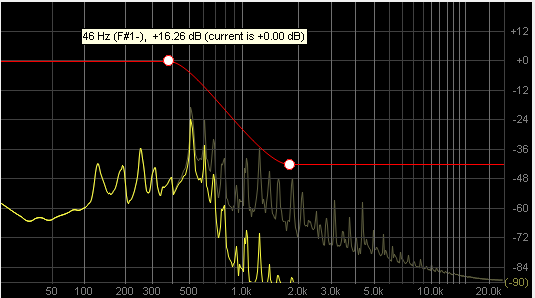

In [ ]:
lowPassFilter = #init LowPass
wavLP = lowPassFilter(wav)
wavLPSpec = specTransform(wavLP)

In [ ]:
display.display(display.Audio(wavLP, rate=sr))

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,wavLPSpec.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(wavLPSpec.squeeze()+1e-8),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

### High-Pass

Leaves higher frequencies(above cutoff) intact while supressing lower frequencies(below cutoff). 

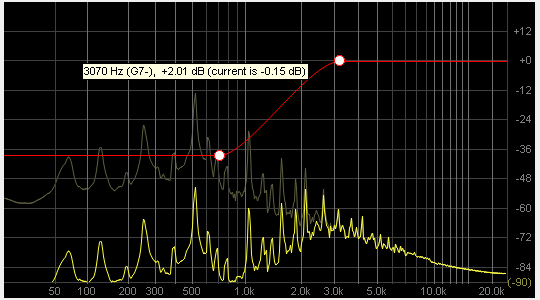

In [ ]:
freqsR = np.arange(0,nFFT/2+0.0001)/(nFFT)*sr
highPassFilter = #init HighPass
wavHP = highPassFilter(wav)
wavHPSpec = specTransform(wavHP)

In [ ]:
display.display(display.Audio(wavHP, rate=sr))

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,wavHPSpec.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(wavHPSpec.squeeze()+1e-8),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()

### Band-Pass

Combines Low-Pass and High-Pass filters.

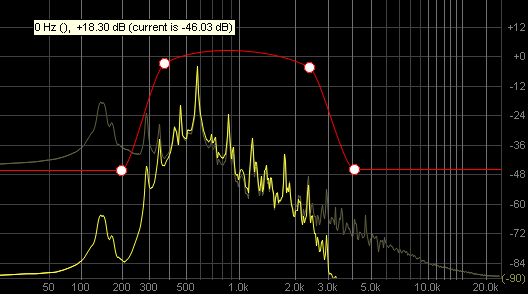

In [ ]:
freqsR = np.arange(0,nFFT/2+0.0001)/(nFFT)*sr
bandPassFilter = ##init BandPass
wavBP = bandPassFilter(wav)
wavBPSpec = specTransform(wavBP)

In [ ]:
display.display(display.Audio(wavBP, rate=sr))

In [ ]:
f,ax = plt.subplots(figsize=(26, 7))

tGrid = np.arange(0,wavBPSpec.shape[2]*hopSize, hopSize)/sr
fGrid = freqsR
tt,ff = np.meshgrid(tGrid,fGrid)

im=ax.pcolormesh(tt,ff,20*torch.log10(wavBPSpec.squeeze()+1e-8),cmap="gist_heat")
ax.set_xlabel('Time, sec', size=20)
ax.set_ylabel('Frequency, Hz', size=20)
ax.set_yscale("function",functions=(melForward,melInverse))
f.colorbar(im)
plt.show()